<a href="https://colab.research.google.com/github/mohammadabid-macad/DE-G11/blob/main/GEN_03_Method_01_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Features Definition

    Overhang (Continuous):
        Definition: Represents the extent to which parts of the shape extend beyond a base or another part, possibly indicating overhanging design elements.
        Utility: Useful for assessing potential structural challenges or aesthetic characteristics.
    Inclusion Rate (Continuous):
        Definition: Percentage indicating the proportion of the shape within specified criteria or boundaries.
        Utility: Measures compliance with design specifications, can be used for quality control.
    Exclusion Rate (Continuous):
        Definition: Percentage indicating the proportion of the shape outside specified criteria or boundaries.
        Utility: Helps in understanding deviations from design norms or expected features.
    Porosity (Continuous):
        Definition: Ratio of surface area to volume, giving insight into the texture or material properties of the shape.
        Utility: Important in materials science, affecting properties like strength, permeability, and appearance.
    Volume (Continuous):
        Definition: The total three-dimensional space occupied by the shape.
        Utility: Essential for size-related calculations, space usage, and material estimation.
    Surface Area (Continuous):
        Definition: Total area that the surface of the shape occupies.
        Utility: Important in processes like coating or painting, heat exchange calculations, and cost estimations based on surface treatments.
    Compactness (Continuous):
        Definition: Measures how space-efficient the shape is, related to how closely it approximates a sphere (the most compact three-dimensional shape).
        Utility: Reflects design efficiency, with implications for material usage and structural integrity.
    Eccentricity (Continuous):
        Definition: Measures the deviation of the shape from perfect symmetry, quantifying shape elongation or irregularity.
        Utility: Critical in assessing balance, aesthetics, and physical performance, especially where directional properties are important.
    Total Blocks (Discrete):
        Definition: The count of discrete elements or components making up the shape.
        Utility: Useful for inventory management, manufacturing process analysis, and cost estimation based on unit operations.
    Total Cost (Continuous):
        Definition: The overall cost associated with the shape, aggregating materials, production, and possibly design costs.
        Utility: Crucial for financial analysis, budgeting, and economic assessment of production efficiency.
    Layer Diff Sum (Continuous):
        Definition: A cumulative measure of the differences between layers in terms of block count or configuration.
        Utility: Indicates complexity in layer-based manufacturing processes, such as 3D printing or layered fabrication.
    Layer Diff Max (Continuous):
        Definition: The maximum difference observed between any two consecutive layers, highlighting potential points of stress or weakness.
        Utility: Useful for identifying critical points in the manufacturing or assembly process that may require reinforcement or redesign.

# Loading Data

In [ ]:
# Load data
data = pd.read_csv('/content/mesh01_1600 gen.csv')
pd.set_option('display.max_columns', None)

print(data)

       Point_1   Point_2   Point_3   Point_4   Point_5   Point_6   Point_7  \
0    -0.606839 -0.587484 -0.500413 -0.632516 -0.460059 -0.351196 -0.170944   
1    -0.604103 -0.586336 -0.496673 -0.629425 -0.459482 -0.347880 -0.168851   
2    -0.531263 -0.558294 -0.444016 -0.543730 -0.409730 -0.302181 -0.100727   
3    -0.479391 -0.537496 -0.399539 -0.483633 -0.379249 -0.263802 -0.054210   
4    -0.437053 -0.520004 -0.358975 -0.435158 -0.357353 -0.229080 -0.017486   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.458224  0.465490  0.133809  0.572833  0.303829  0.348234  0.417514   
1596  0.456968  0.476596  0.169114  0.573474  0.306716  0.357684  0.427300   
1597  0.455307  0.486826  0.201892  0.572648  0.308756  0.366271  0.436528   
1598  0.454099  0.495666  0.228530  0.571187  0.309751  0.372496  0.441801   
1599  0.452896  0.501981  0.249618  0.570613  0.309756  0.376240  0.447416   

       Point_8   Point_9  deviation_factor  Number_of-units  co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Point_1                          1600 non-null   float64
 1   Point_2                          1600 non-null   float64
 2   Point_3                          1600 non-null   float64
 3   Point_4                          1600 non-null   float64
 4   Point_5                          1600 non-null   float64
 5   Point_6                          1600 non-null   float64
 6   Point_7                          1600 non-null   float64
 7   Point_8                          1600 non-null   float64
 8   Point_9                          1600 non-null   float64
 9   deviation_factor                 1600 non-null   float64
 10  Number_of-units                  1600 non-null   int64  
 11  cost                             1600 non-null   int64  
 12  area                

In [ ]:
# Rename columns by replacing spaces with underscores
data.columns = data.columns.str.replace(' ', '_')

# Verify the changes
print(data.columns)


Index(['Point_1', 'Point_2', 'Point_3', 'Point_4', 'Point_5', 'Point_6',
       'Point_7', 'Point_8', 'Point_9', 'deviation_factor', 'Number_of-units',
       'cost', 'area', 'vert/hori_area_factor_z-axis',
       'Avg_curvature_angle_z_axis', 'vert/hori_area_factor_x-axis',
       'Avarage_curvatrure_angle_x_axis', 'vert/hori_area_factor_y-axis',
       'Avg_curvature_angle_y_axis'],
      dtype='object')


array([[<Axes: title={'center': 'deviation_factor'}>]], dtype=object)

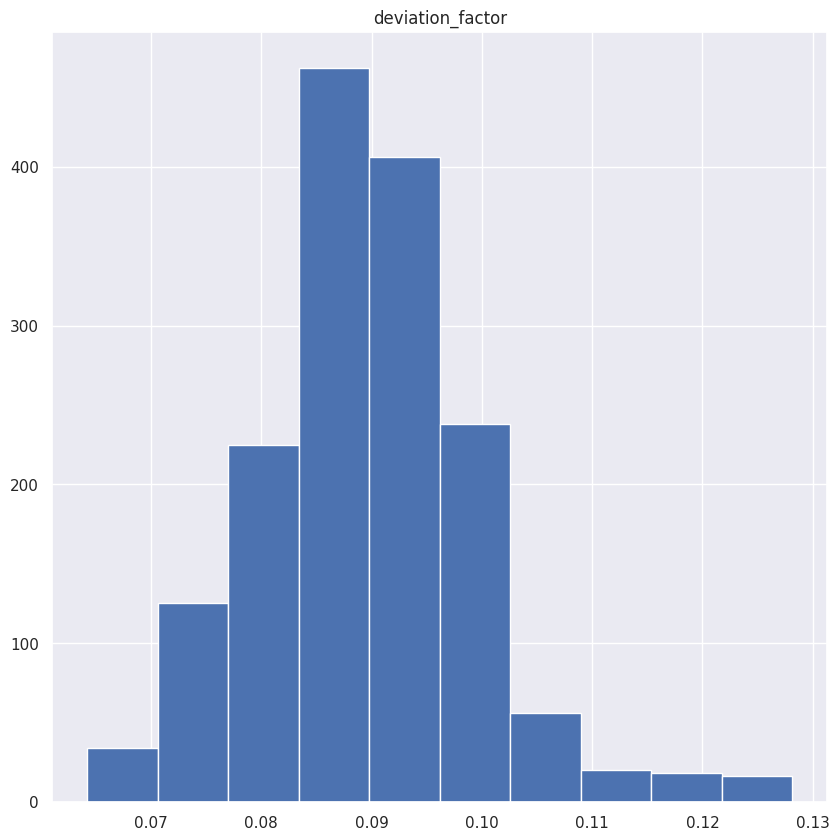

In [ ]:
data.hist("deviation_factor")

array([[<Axes: title={'center': 'Number_of-units'}>]], dtype=object)

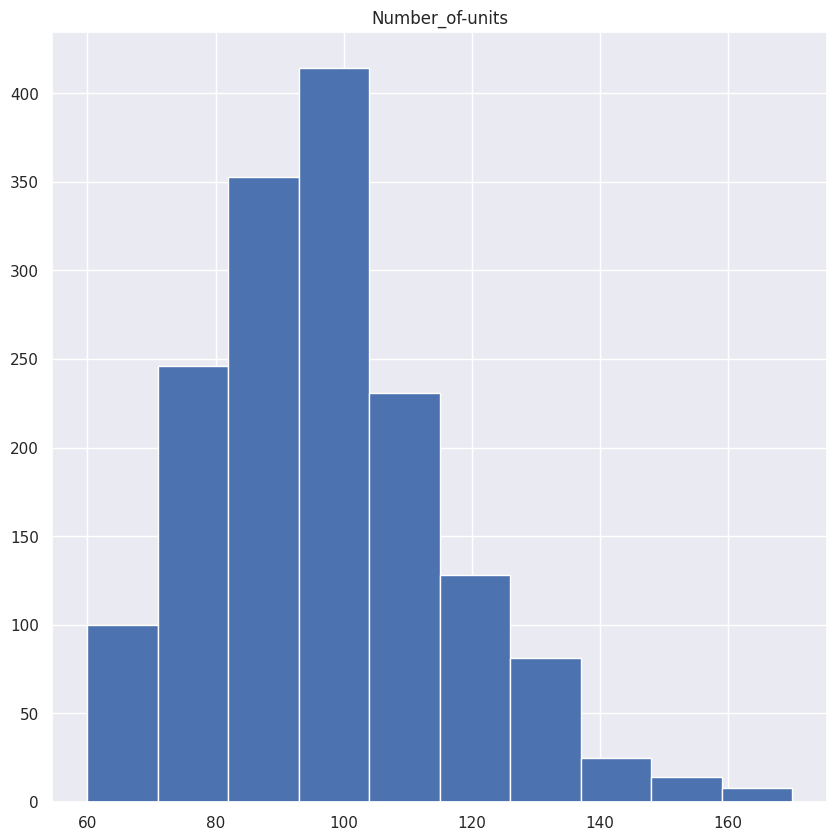

In [ ]:
data.hist("Number_of-units")

array([[<Axes: title={'center': 'cost'}>]], dtype=object)

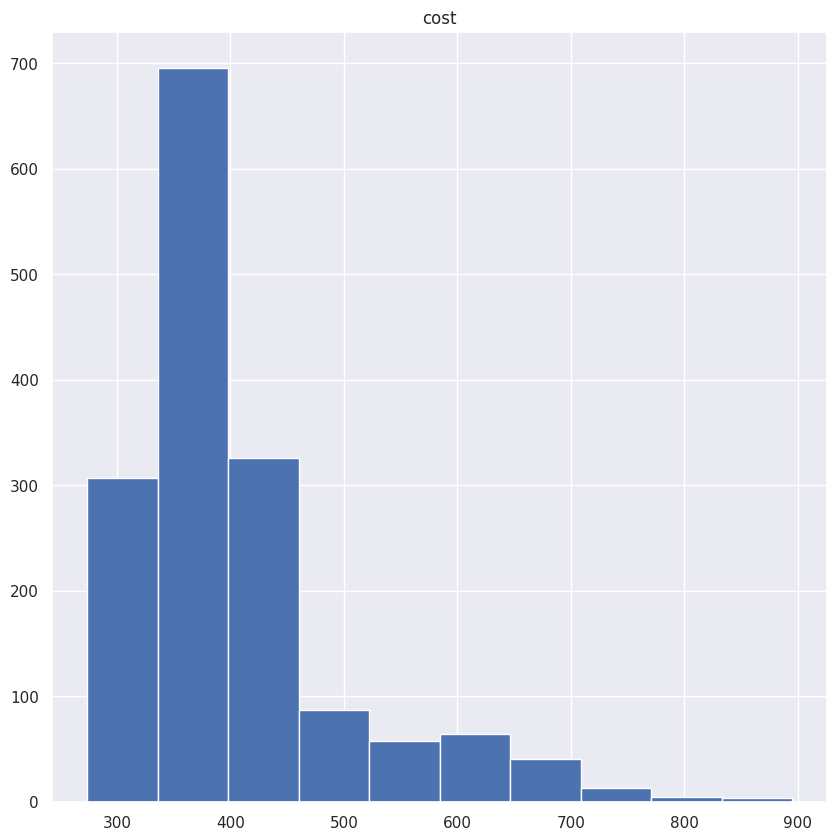

In [ ]:
data.hist("cost")

# Total_Blocks VS All Features

<Axes: xlabel='Number_of-units', ylabel='deviation_factor'>

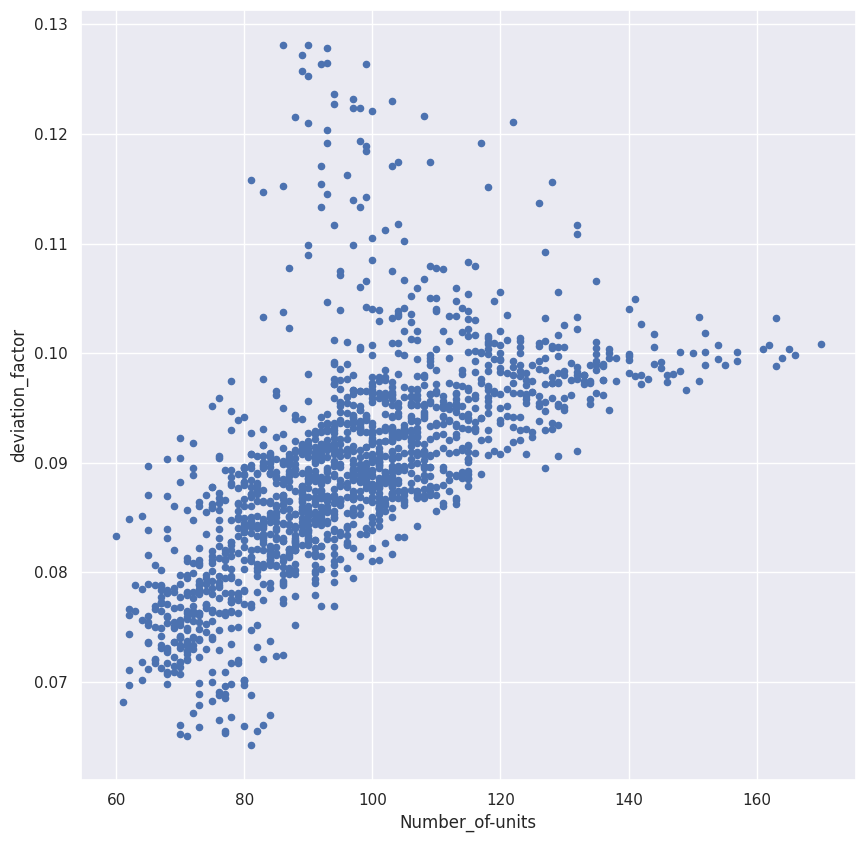

In [ ]:
data.plot.scatter("Number_of-units", "deviation_factor")

<Axes: xlabel='Number_of-units', ylabel='area'>

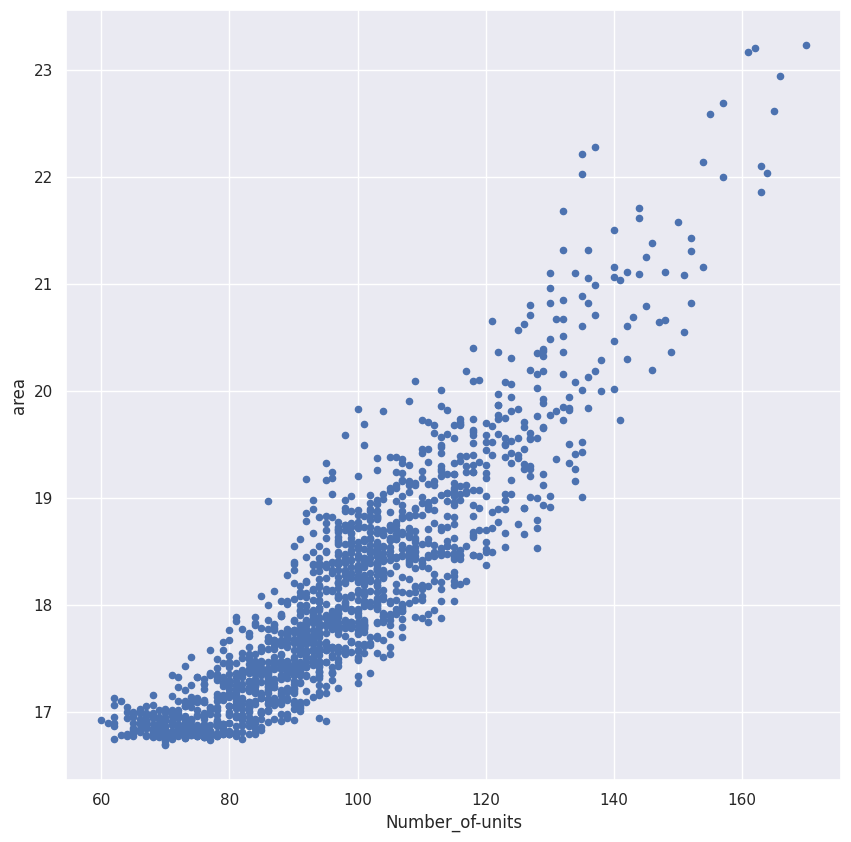

In [ ]:
data.plot.scatter("Number_of-units", "area")

Prepare data

<Axes: xlabel='Number_of-units', ylabel='cost'>

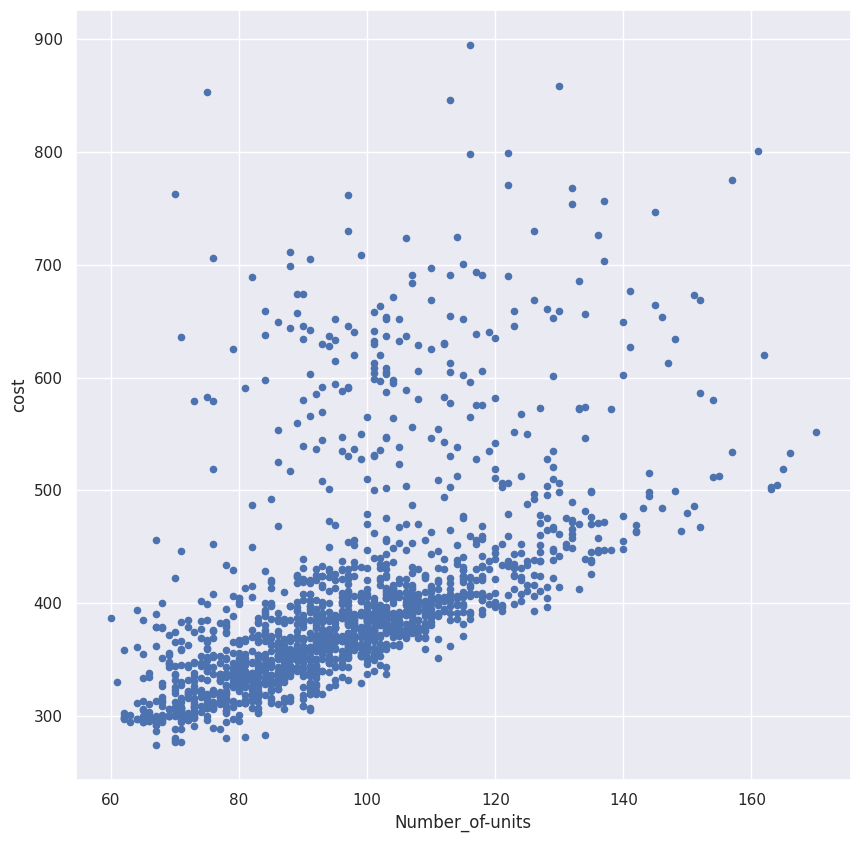

In [ ]:
data.plot.scatter("Number_of-units", "cost")

<Axes: xlabel='Number_of-units', ylabel='vert/hori_area_factor_z-axis'>

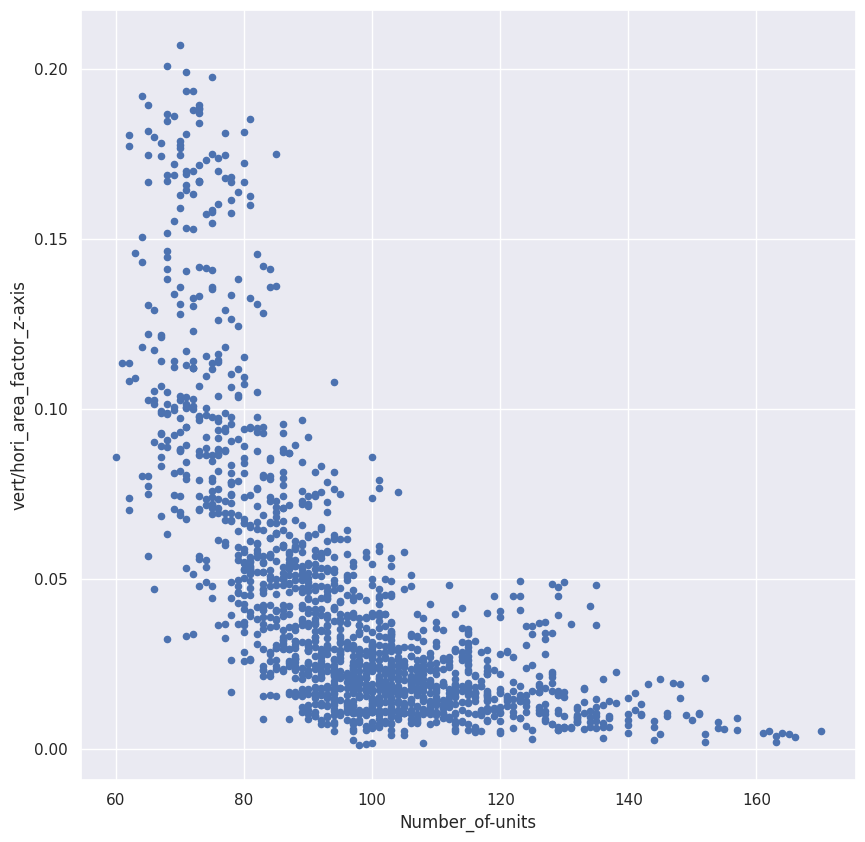

In [ ]:
data.plot.scatter("Number_of-units", "vert/hori_area_factor_z-axis")

<Axes: xlabel='Number_of-units', ylabel='Avg_curvature_angle_z_axis'>

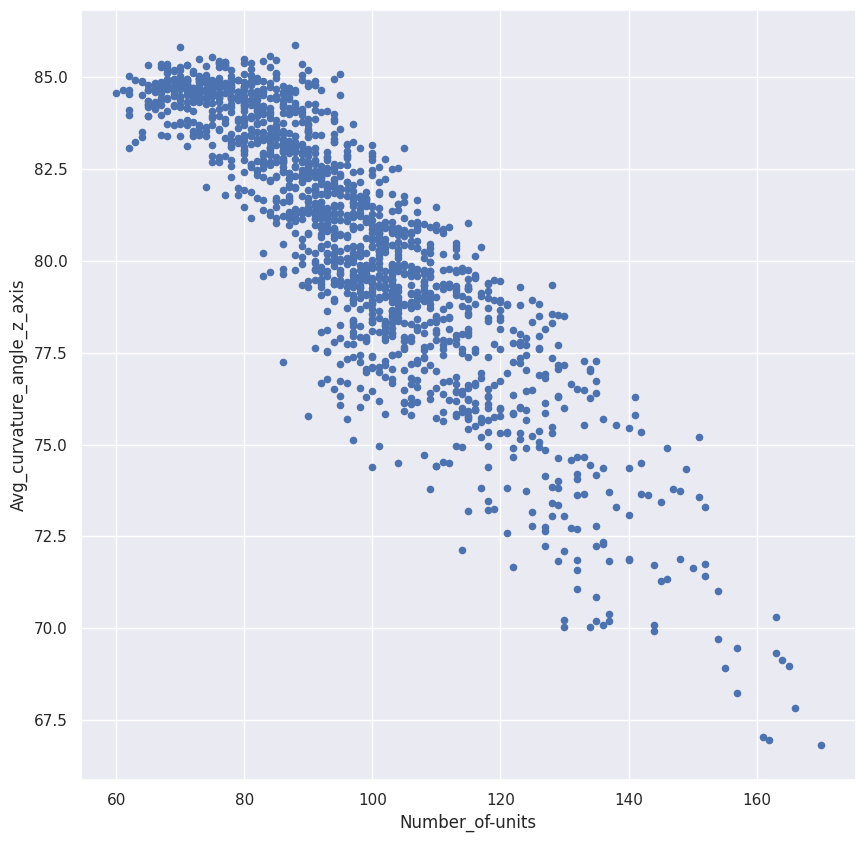

In [ ]:
data.plot.scatter("Number_of-units", "Avg_curvature_angle_z_axis")

<Axes: xlabel='Number_of-units', ylabel='Avarage_curvatrure_angle_x_axis'>

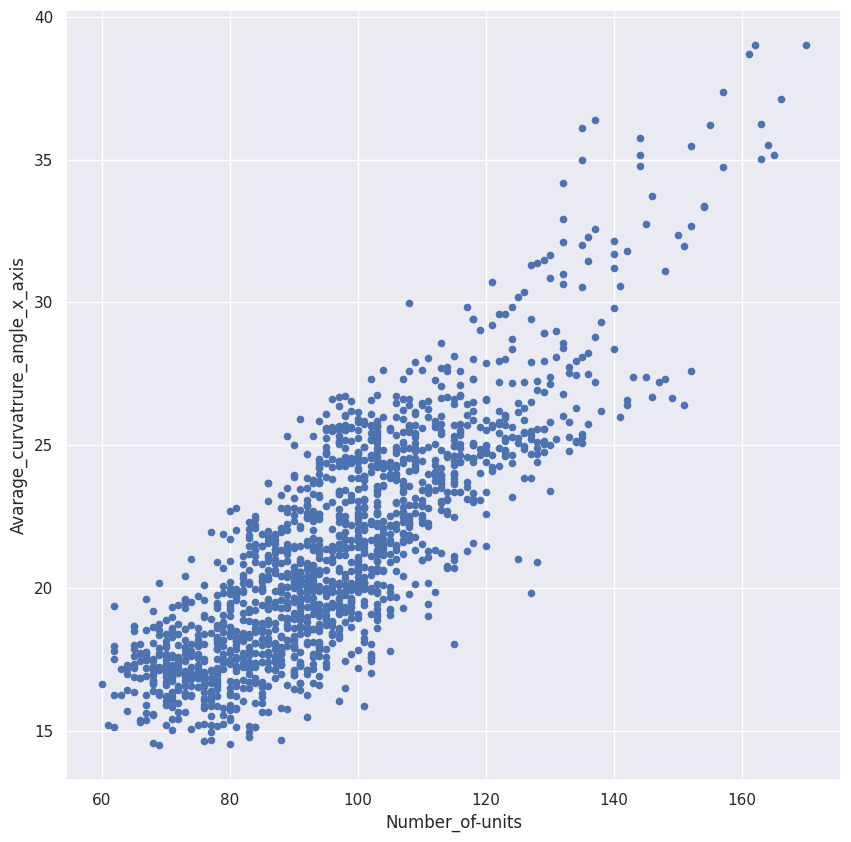

In [ ]:
data.plot.scatter("Number_of-units", "Avarage_curvatrure_angle_x_axis")

<Axes: xlabel='Number_of-units', ylabel='Avg_curvature_angle_y_axis'>

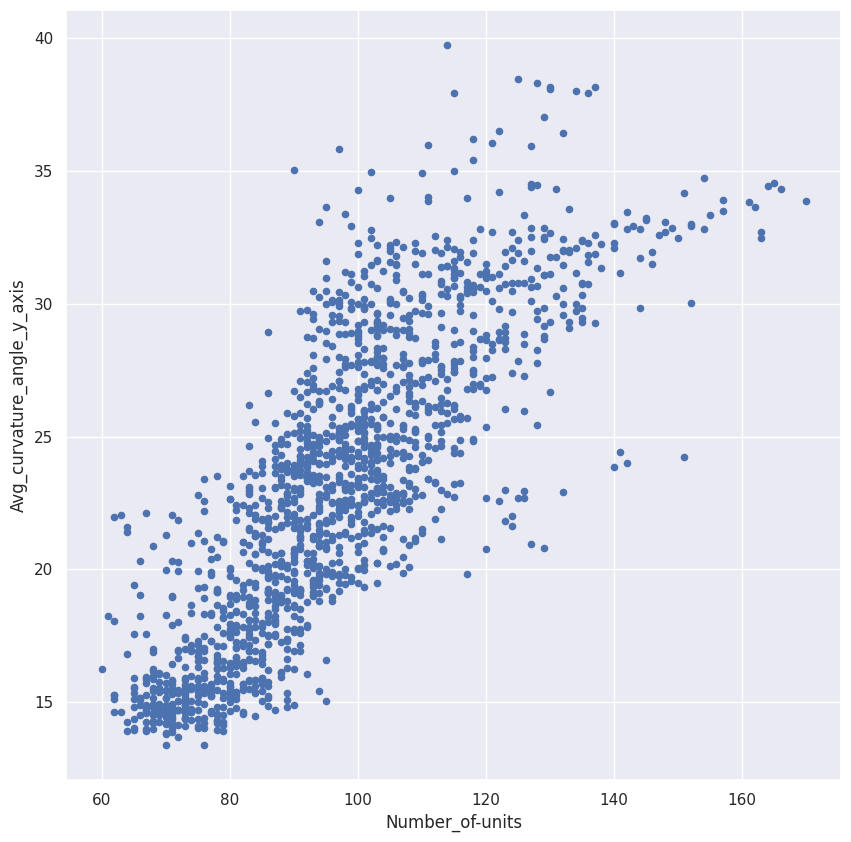

In [ ]:
data.plot.scatter("Number_of-units", "Avg_curvature_angle_y_axis")

<Axes: xlabel='Number_of-units', ylabel='vert/hori_area_factor_x-axis'>

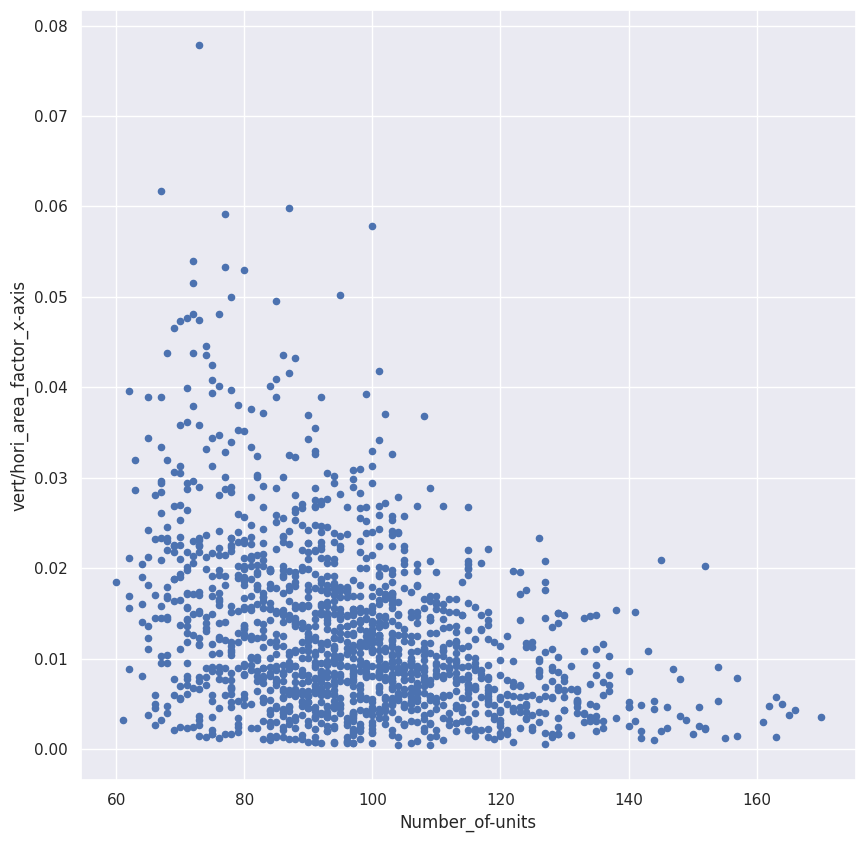

In [ ]:
data.plot.scatter("Number_of-units", "vert/hori_area_factor_x-axis")

<Axes: xlabel='Number_of-units', ylabel='vert/hori_area_factor_y-axis'>

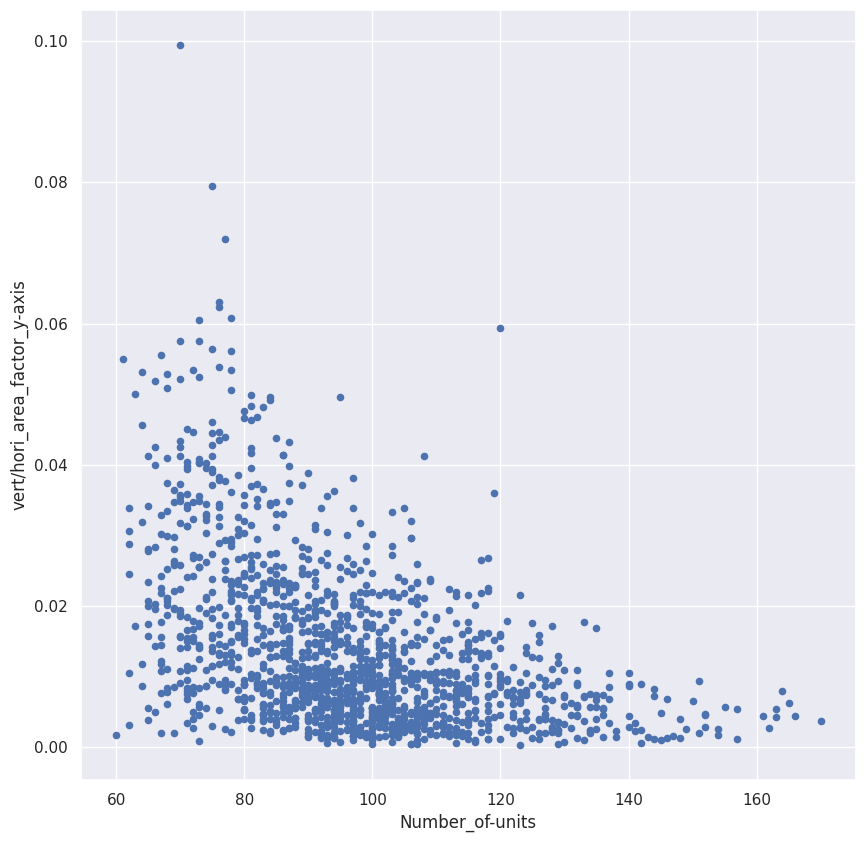

In [ ]:
data.plot.scatter("Number_of-units", "vert/hori_area_factor_y-axis")

# Analyzing Feature Importance

**1.Correlation matrix to understand the features**

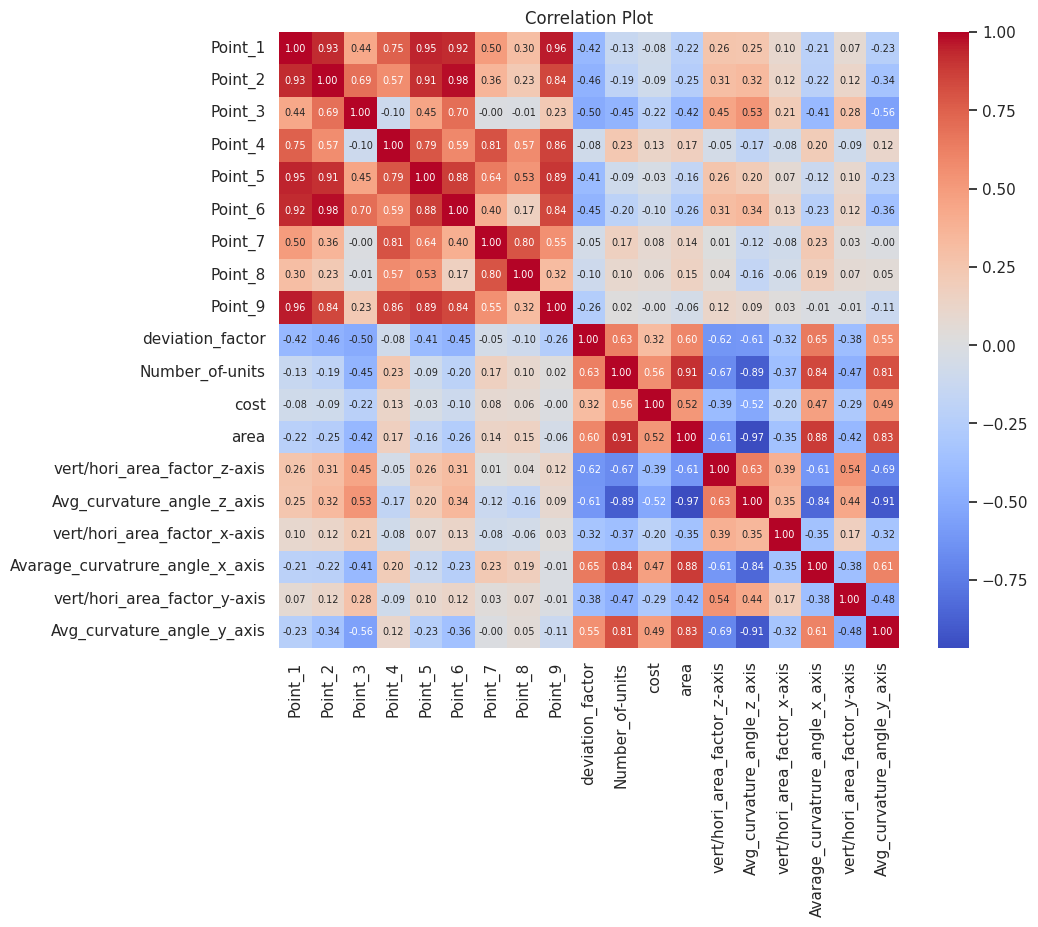

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',annot_kws={"size": 7}, fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
# Drop columns
columns_to_drop = ['Point_1', 'Point_2', 'Point_3', 'Point_4', 'Point_5', 'Point_6','Point_7','Point_8', 'Point_9']
data_refine = data.drop(columns=columns_to_drop, axis=1)

print(data_refine)


      deviation_factor  Number_of-units  cost       area  \
0             0.100047              137   472  22.286993   
1             0.099946              135   499  22.221495   
2             0.110835              132   461  20.853707   
3             0.121134              122   506  19.971869   
4             0.095648              111   419  19.335164   
...                ...              ...   ...        ...   
1595          0.086405              100   362  18.468660   
1596          0.087308              105   388  18.508660   
1597          0.090032               94   372  18.549311   
1598          0.092636              105   652  18.605385   
1599          0.095240              106   724  18.656640   

      vert/hori_area_factor_z-axis  Avg_curvature_angle_z_axis  \
0                         0.009105                   70.381780   
1                         0.012303                   70.201261   
2                         0.008360                   72.712930   
3              

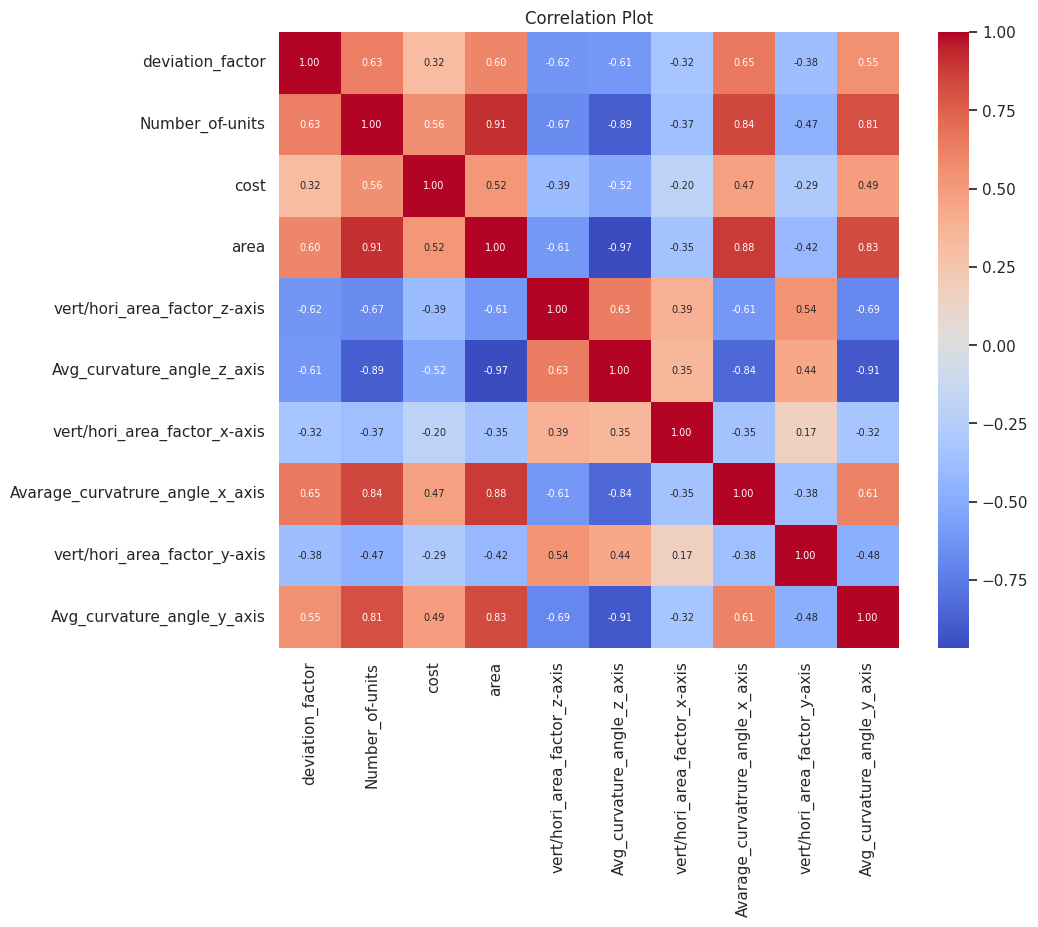

In [ ]:
# Calculate the correlation matrix
corr = data_refine.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',annot_kws={"size": 7}, fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [ ]:
print(data_refine.columns)


Index(['deviation_factor', 'Number_of-units', 'cost', 'area',
       'vert/hori_area_factor_z-axis', 'Avg_curvature_angle_z_axis',
       'vert/hori_area_factor_x-axis', 'Avarage_curvatrure_angle_x_axis',
       'vert/hori_area_factor_y-axis', 'Avg_curvature_angle_y_axis'],
      dtype='object')


**2.Feature importance model to predict total blocks**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(['Number_of-units', 'Avg_curvature_angle_z_axis'], axis=1)
target_blocks = data['Number_of-units']
target_cost = data['Avg_curvature_angle_z_axis']

# Split the data into training and testing sets
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features, target_blocks, test_size=0.2, random_state=42)
X_train, X_test, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.2, random_state=42)

      Number_of-units  Avg_curvature_angle_z_axis
0                 137                   70.381780
1                 135                   70.201261
2                 132                   72.712930
3                 122                   74.893230
4                 111                   76.384138
...               ...                         ...
1595              100                   79.247841
1596              105                   79.655590
1597               94                   79.849401
1598              105                   79.865337
1599              106                   79.724348

[1600 rows x 2 columns]


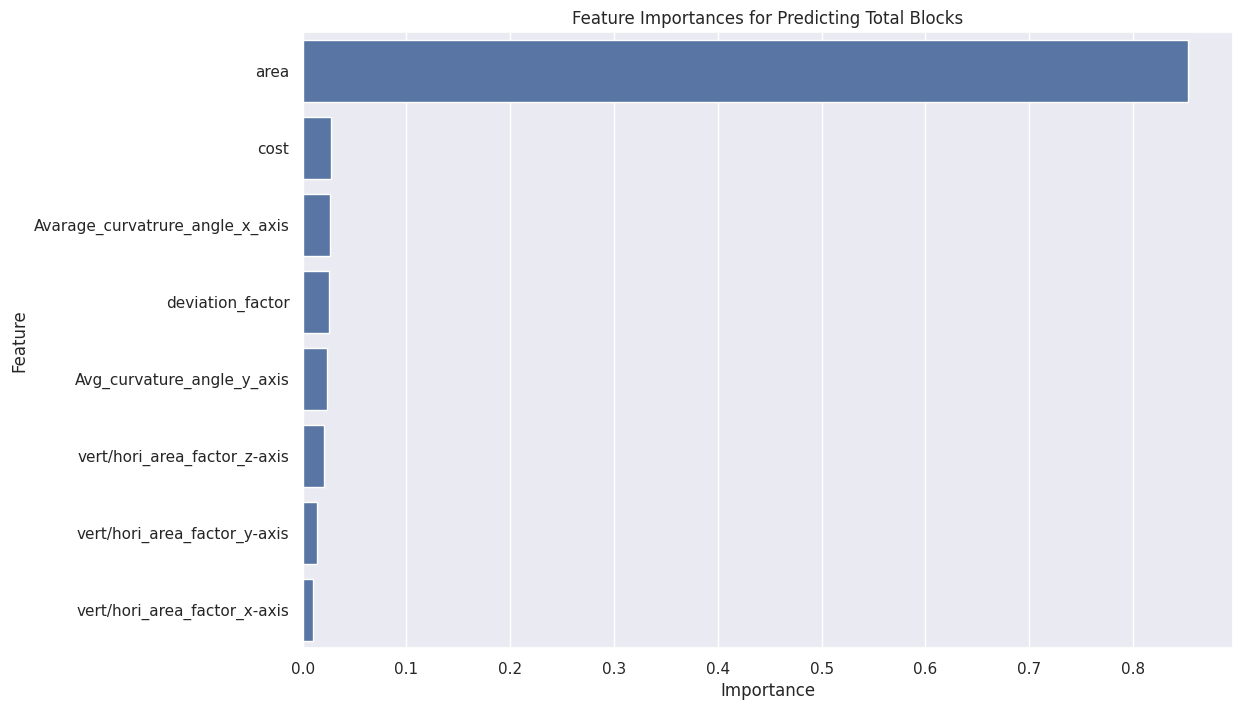

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Select the (independent) features that we are going to use to train the model
X_lengths = data_refine.loc[:, ["Number_of-units", "Avg_curvature_angle_z_axis"]]
print(X_lengths)

# Define features and target variables
features = data_refine.drop(['Number_of-units', 'Avg_curvature_angle_z_axis'], axis=1)
target_blocks = data_refine['Number_of-units']
target_cost = data_refine['Avg_curvature_angle_z_axis']

# Split the data into training and testing sets
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features, target_blocks, test_size=0.2, random_state=42)
X_train, X_test, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.2, random_state=42)

# Handle missing values by imputing with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Example with a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train_blocks)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Total Blocks')
plt.show()


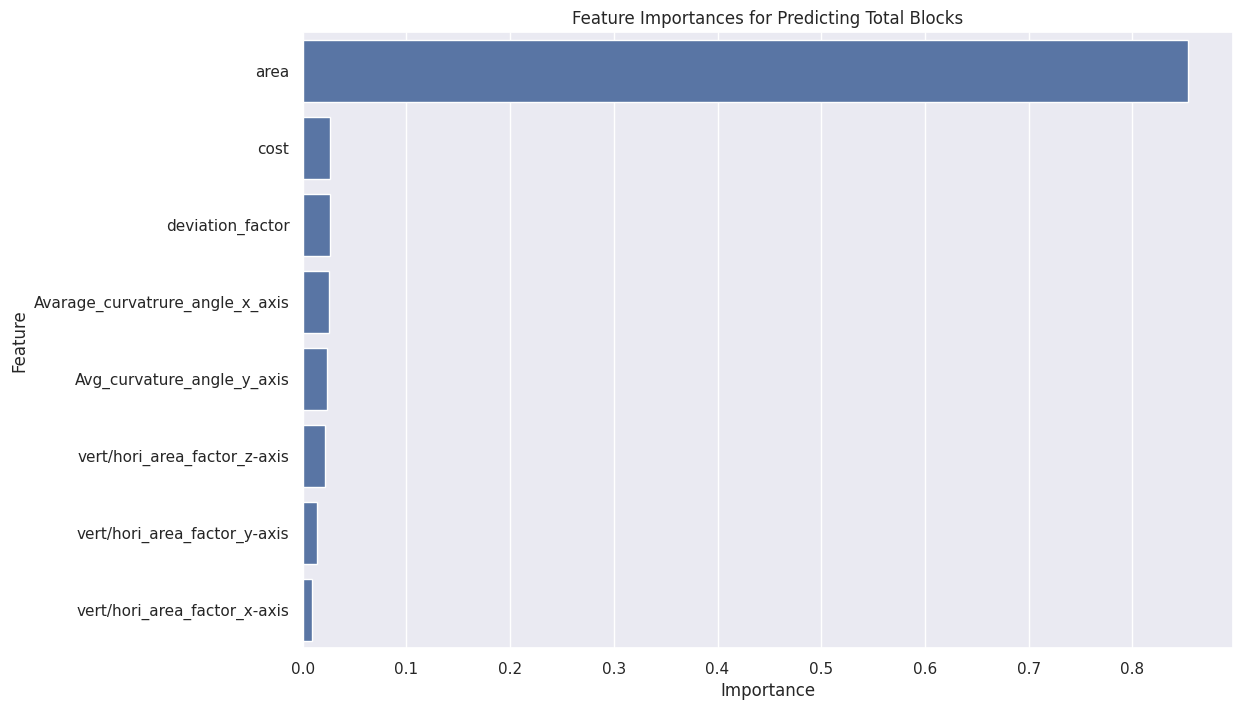

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Example with a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train_blocks)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Total Blocks')
plt.show()


**3. Learning Curves:**
Learning curves show the performance of your model on training and validation sets as a function of the number of training samples, which helps you understand if your model is overfitting or underfitting.


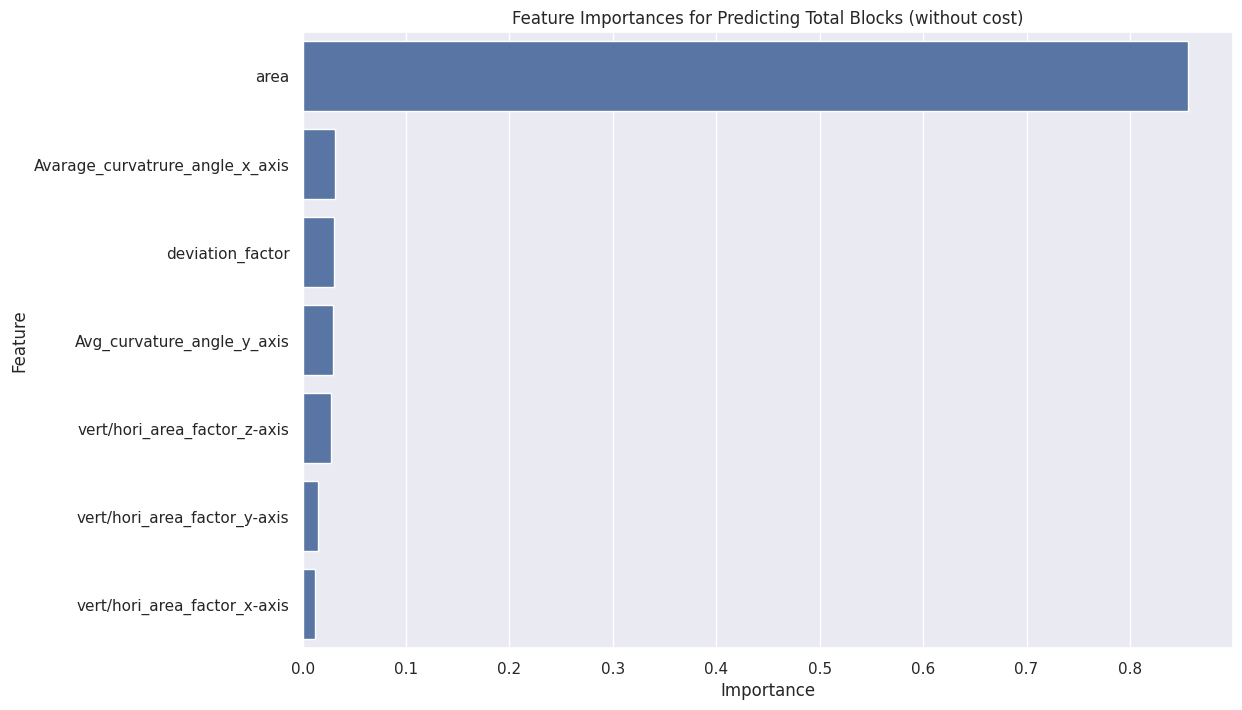

In [ ]:
# Define features and target variables without 'cost'
features_without_cost = data_refine.drop(['Number_of-units', 'Avg_curvature_angle_z_axis', 'cost'], axis=1)
target_blocks_without_cost = data_refine['Number_of-units']

# Split the data into training and testing sets
X_train_without_cost, X_test_without_cost, y_train_blocks_without_cost, y_test_blocks_without_cost = train_test_split(features_without_cost, target_blocks_without_cost, test_size=0.2, random_state=42)

# Handle missing values by imputing with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_without_cost = imputer.fit_transform(X_train_without_cost)
X_test_without_cost = imputer.transform(X_test_without_cost)

# Train the model without 'cost'
model_blocks_without_cost = RandomForestRegressor()
model_blocks_without_cost.fit(X_train_without_cost, y_train_blocks_without_cost)

# Get feature importances again
importances_without_cost = model_blocks_without_cost.feature_importances_
feature_names_without_cost = features_without_cost.columns

# Create a DataFrame for better visualization
feature_importances_without_cost = pd.DataFrame({'Feature': feature_names_without_cost, 'Importance': importances_without_cost})

# Sort the features by importance
feature_importances_without_cost = feature_importances_without_cost.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_without_cost)
plt.title('Feature Importances for Predicting Total Blocks (without cost)')
plt.show()


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


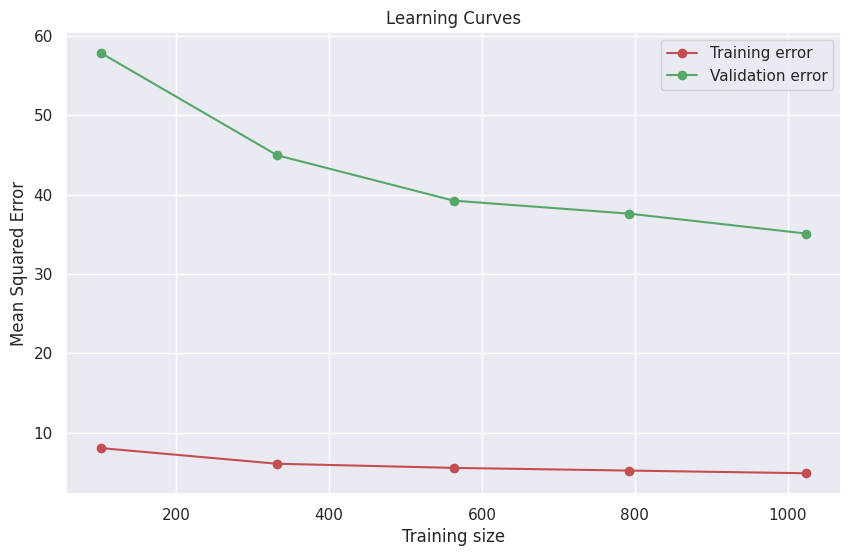

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_blocks_without_cost, X_train, y_train_blocks, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

**4. Pair Plot** (Scatterplot Matrix)
A pair plot allows you to visualize the pairwise relationships between features and between features and the target variable. This can help identify correlations and potential outliers.



In [ ]:
import seaborn as sns


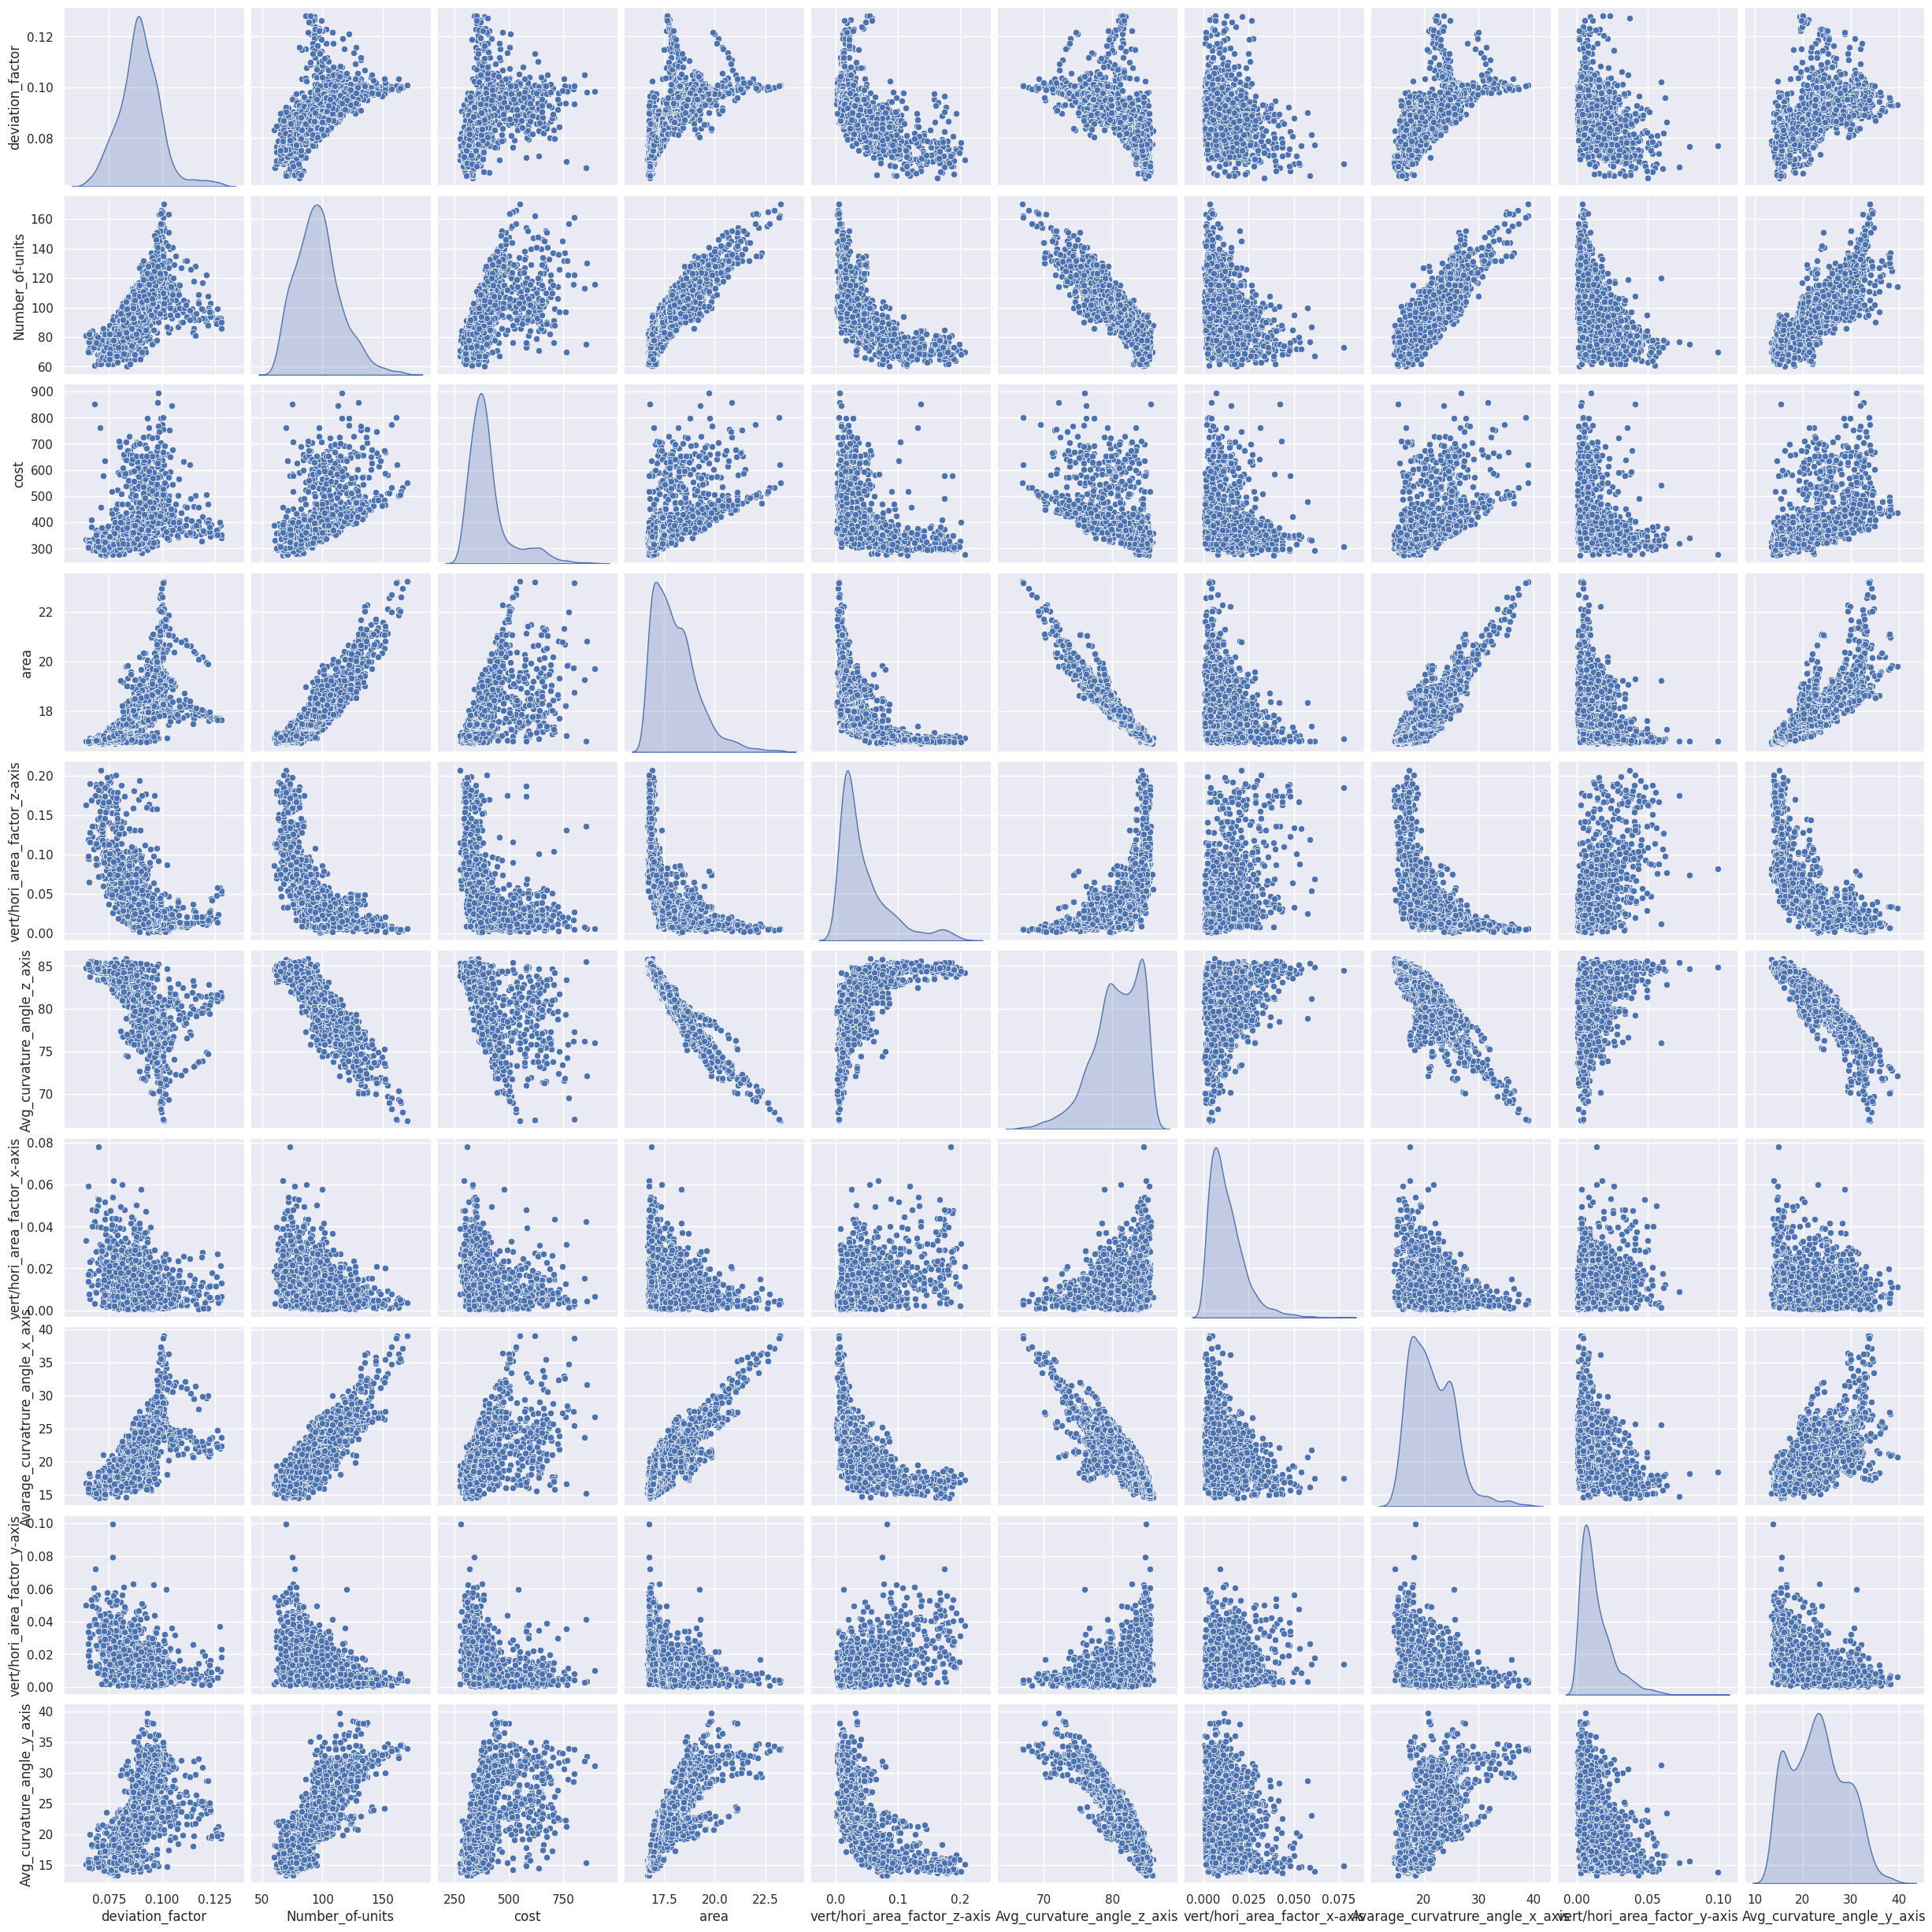

In [ ]:


# Pair plot for all features including the target variable
sns.pairplot(data_refine, diag_kind='kde')
plt.show()


# PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA  # Import PCA


In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # We are only interested in the first two principal components for this plot
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Explained variance ratio of each component: [0.55799437 0.11444995]


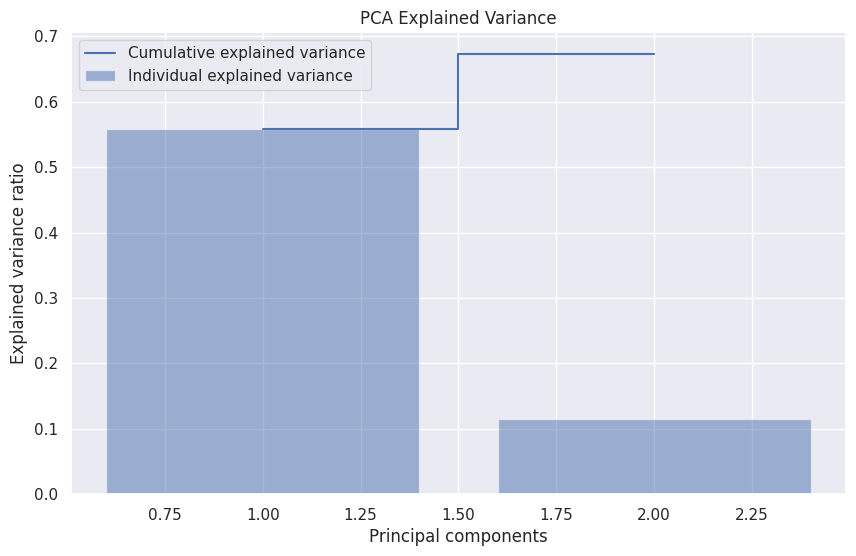

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio of each component: {explained_variance}')

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()


In [ ]:
# Select features and target variables
features = data_refine.drop(['Number_of-units', 'Avg_curvature_angle_z_axis'], axis=1)
target_blocks = data_refine['Number_of-units']

# Split the data into features and target variables
X_train, X_test, y_train, y_test = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Handle missing values by imputing with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest Model on PCA components
model_rf_pca = RandomForestRegressor()
model_rf_pca.fit(X_train_pca, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import mean_squared_error and r2_score


# Evaluate the Random Forest Model
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)  # Import r2_score

print(f'Random Forest Model (PCA) - MSE: {mse_rf_pca}, R²: {r2_rf_pca}')


Random Forest Model (PCA) - MSE: 61.8454546875, R²: 0.791248047990002


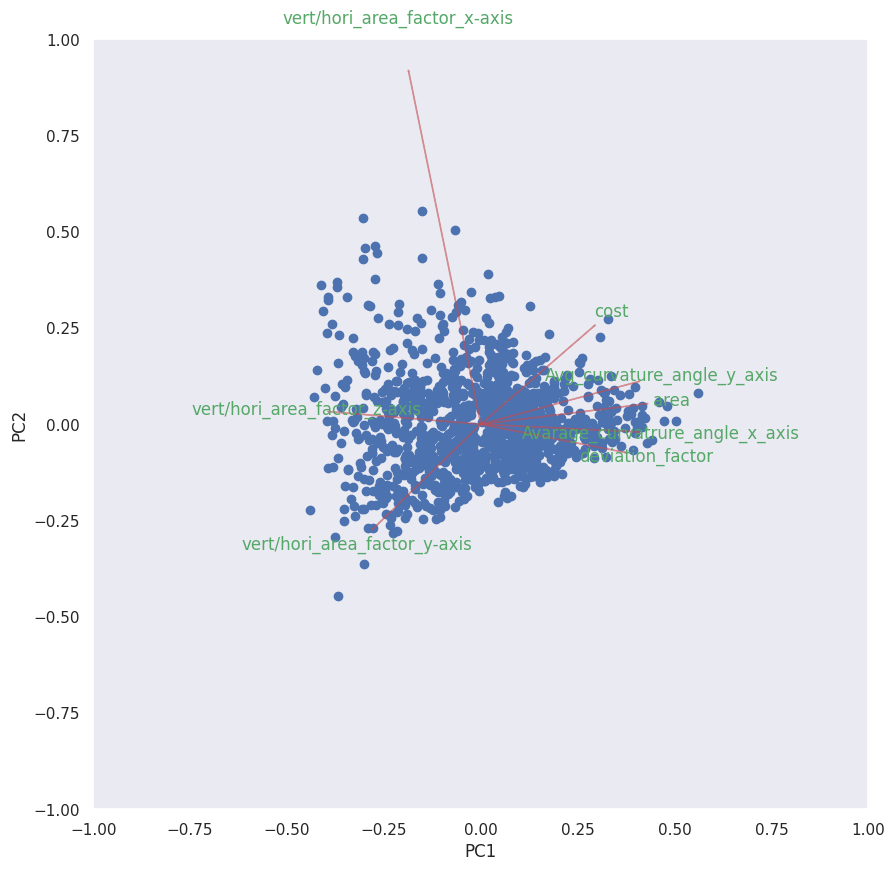

In [ ]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, features.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function with the first two principal components
myplot(X_train_pca[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()


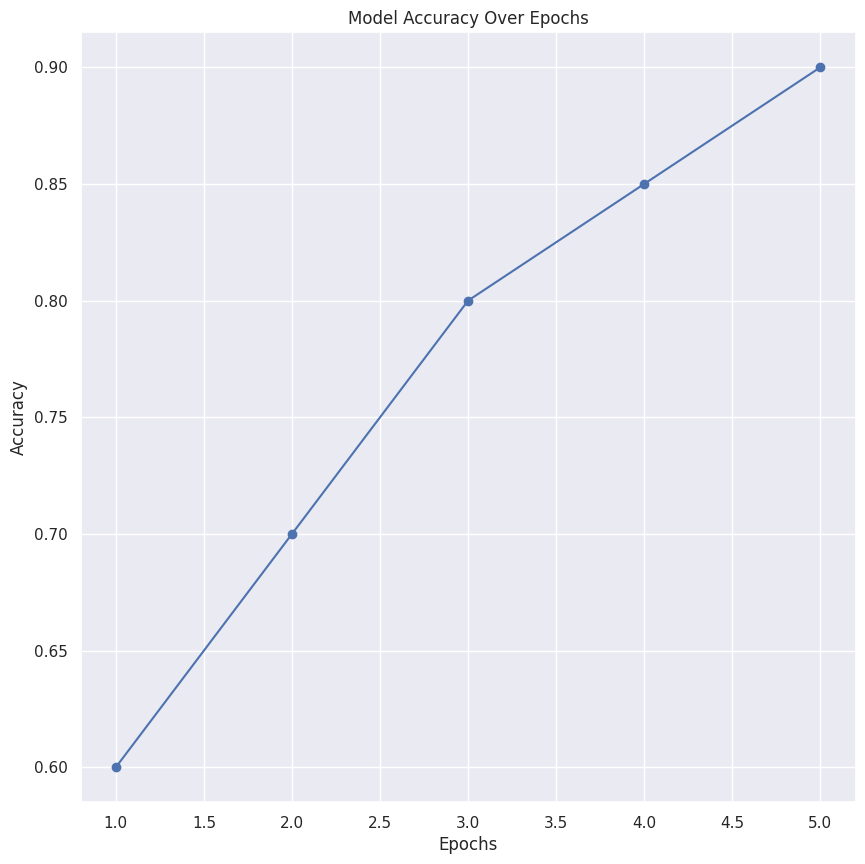

In [ ]:
# Example accuracy data
epochs = [1, 2, 3, 4, 5]  # Epoch numbers
accuracies = [0.6, 0.7, 0.8, 0.85, 0.9]  # Accuracy values corresponding to each epoch

# Plotting the graph
plt.plot(epochs, accuracies, marker='o', linestyle='-')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_lengths_scaled = scalerX.fit_transform(X_lengths)

In [ ]:
# Define the dependant variable / target to predict
y_reg = data.Number_of_units


In [ ]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_lengths_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Train model

In [ ]:
# Import and instantiate the baseline model
SKmodel = LinearRegression()

# Model training
SKmodel.fit(X_train, y_train)

# Make predictions
y_pred = SKmodel.predict(X_test)

# Model performance on the test-set / This score is R^2
print('R^2 Score:', SKmodel.score(X_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R^2 Score: 1.0
Mean Squared Error: 1.5840326976837918e-28


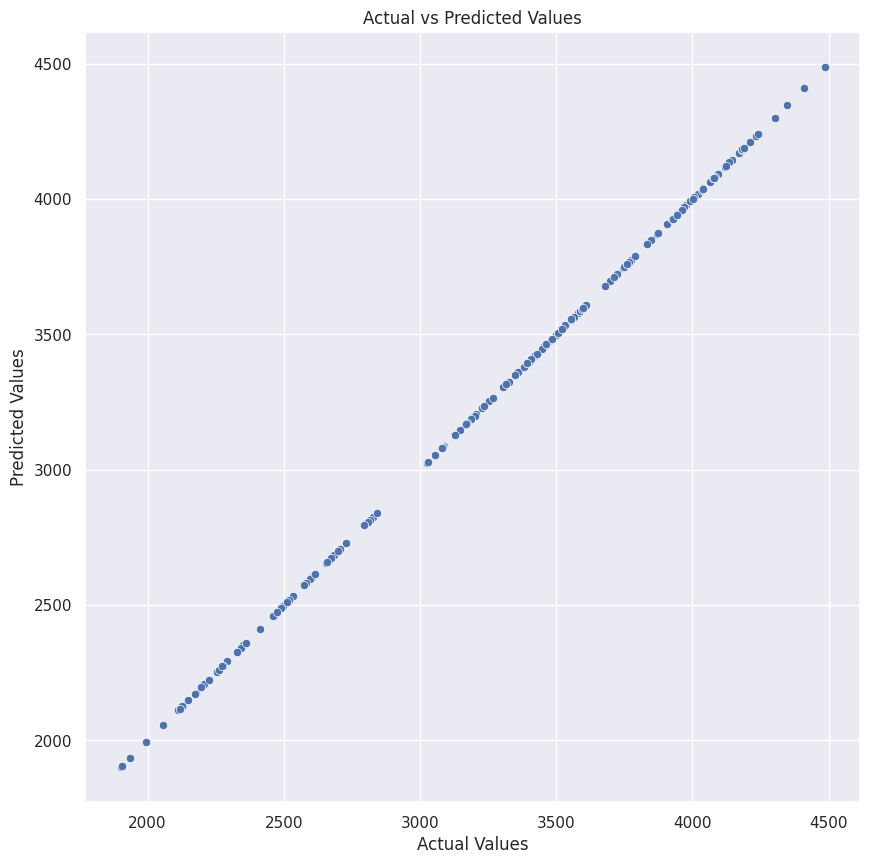

In [ ]:

# Plotting the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Dropping least important Features

Cell 1: Define Reduced Features

In [ ]:
# Define features and target variables for Total_Blocks prediction
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Define reduced features by dropping the least important ones
reduced_features = features.drop(['Eccentricity', 'Volume', 'Porosity', 'Overhang'], axis=1)


Cell 2: Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with reduced features for Total_Blocks
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced_features, target_blocks, test_size=0.2, random_state=42)


Cell 3: Train the Model with Reduced Features

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model with reduced features
model_reduced = RandomForestRegressor()
model_reduced.fit(X_train_reduced, y_train_reduced)


RandomForestRegressor()

Cell 4: Evaluate the New Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the new model
y_pred_reduced = model_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)

print('Reduced Model - MSE:', mse_reduced)
print('Reduced Model - R²:', r2_reduced)


Reduced Model - MSE: 185.33701770358797
Reduced Model - R²: 0.9951417592864538


Cell 5: Train and Evaluate the Original Model (for Comparison)

In [ ]:
# Assuming the original model has not been defined in this session
# Define the original features and target again
X_train, X_test, y_train_blocks, y_test_blocks = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Train the original model
model = RandomForestRegressor()
model.fit(X_train, y_train_blocks)

# Evaluate the original model
y_pred_original = model.predict(X_test)
mse_original = mean_squared_error(y_test_blocks, y_pred_original)
r2_original = r2_score(y_test_blocks, y_pred_original)

print('Original Model - MSE:', mse_original)
print('Original Model - R²:', r2_original)


Original Model - MSE: 134.99399512619377
Original Model - R²: 0.9964614013361582


Cell 6: Plot the Predictions of the Reduced Model

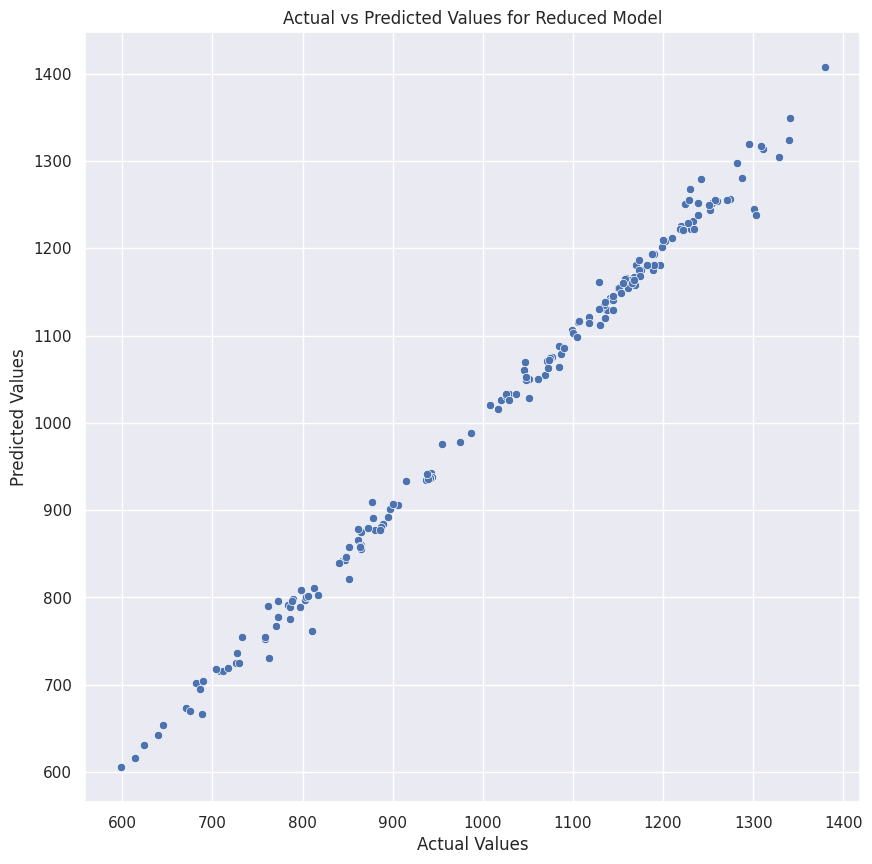

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the predictions of the reduced model
sns.scatterplot(x=y_test_reduced, y=y_pred_reduced)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Reduced Model')
plt.show()


Conclusion:

    Original Model: The original model, which uses all features, performs slightly better in terms of both MSE and R² score. This suggests that the least important features (Eccentricity, Volume, Porosity, Overhang) still provide some marginal value in improving the model's accuracy.

# Overfitting Check on Original Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Train the model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the validation data
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Training MSE: {train_mse}, Training R²: {train_r2}')
print(f'Validation MSE: {val_mse}, Validation R²: {val_r2}')


Training MSE: 22.546688283584793, Training R²: 0.9994743152955539
Validation MSE: 115.74592690262672, Validation R²: 0.9969659511010109


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mse = cross_val_score(model, features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, features, target_blocks, cv=5, scoring='r2')

print(f'Cross-validated MSE: {-cv_mse.mean()}')
print(f'Cross-validated R²: {cv_r2.mean()}')


Cross-validated MSE: 6478.359586631263
Cross-validated R²: 0.8319565594968218


# Overfitting Check on Reduced Features

In [ ]:
# Define reduced features by dropping the least important ones
reduced_features = features.drop(['Eccentricity', 'Volume', 'Porosity', 'Overhang'], axis=1)

# Split the data into training and validation sets with reduced features
X_train_reduced, X_val_reduced, y_train_reduced, y_val_reduced = train_test_split(reduced_features, target_blocks, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Train the model with reduced features
model_reduced = RandomForestRegressor()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluate the model on the training data
y_train_pred_reduced = model_reduced.predict(X_train_reduced)
train_mse_reduced = mean_squared_error(y_train_reduced, y_train_pred_reduced)
train_r2_reduced = r2_score(y_train_reduced, y_train_pred_reduced)

# Evaluate the model on the validation data
y_val_pred_reduced = model_reduced.predict(X_val_reduced)
val_mse_reduced = mean_squared_error(y_val_reduced, y_val_pred_reduced)
val_r2_reduced = r2_score(y_val_reduced, y_val_pred_reduced)

print(f'Reduced Model - Training MSE: {train_mse_reduced}, Training R²: {train_r2_reduced}')
print(f'Reduced Model - Validation MSE: {val_mse_reduced}, Validation R²: {val_r2_reduced}')


Reduced Model - Training MSE: 31.683984850496763, Training R²: 0.9992612757136518
Reduced Model - Validation MSE: 178.10113199565492, Validation R²: 0.995331433615848


In [ ]:
# Perform 5-fold cross-validation
cv_mse_reduced = -cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2_reduced = cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='r2')

print(f'Reduced Model - Cross-validated MSE: {cv_mse_reduced.mean()}')
print(f'Reduced Model - Cross-validated R²: {cv_r2_reduced.mean()}')


Reduced Model - Cross-validated MSE: 6941.967041797677
Reduced Model - Cross-validated R²: 0.8333067115123782


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mse_reduced = -cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='neg_mean_squared_error')
cv_r2_reduced = cross_val_score(model_reduced, reduced_features, target_blocks, cv=5, scoring='r2')

print(f'Reduced Model - Cross-validated MSE: {cv_mse_reduced.mean()}')
print(f'Reduced Model - Cross-validated R²: {cv_r2_reduced.mean()}')


Reduced Model - Cross-validated MSE: 7066.054359757623
Reduced Model - Cross-validated R²: 0.8357534964927152


# TENSORFLOW

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_blocks, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a sequential model
TFmodel = tf.keras.models.Sequential()

# Add dense layers
TFmodel.add(tf.keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
TFmodel.add(tf.keras.layers.Dense(32, activation='relu'))
TFmodel.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
TFmodel.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
TFmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = TFmodel.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, batch_size=16)


Epoch 1/200
36/36 [==============================] - 2s 13ms/step - loss: 425.6721 - val_loss: 404.7448
Epoch 2/200
36/36 [==============================] - 0s 10ms/step - loss: 424.6805 - val_loss: 396.5270
Epoch 3/200
36/36 [==============================] - 0s 12ms/step - loss: 422.3270 - val_loss: 388.7208
Epoch 4/200
36/36 [==============================] - 0s 9ms/step - loss: 410.0729 - val_loss: 370.4120
Epoch 5/200
36/36 [==============================] - 0s 7ms/step - loss: 405.0438 - val_loss: 383.9134
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 391.1188 - val_loss: 357.6544
Epoch 7/200
36/36 [==============================] - 0s 5ms/step - loss: 377.5969 - val_loss: 366.4099
Epoch 8/200
36/36 [==============================] - 0s 6ms/step - loss: 382.0995 - val_loss: 350.3698
Epoch 9/200
36/36 [==============================] - 0s 6ms/step - loss: 377.5282 - val_loss: 352.6464
Epoch 10/200
36/36 [==============================] - 0s 9ms/step - lo

In [ ]:
# Evaluate the model on the test data
loss = TFmodel.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = TFmodel.predict(X_test_scaled)


6/6 [==============================] - 0s 3ms/step - loss: 43.3975
Test Loss: 43.397544860839844
6/6 [==============================] - 0s 3ms/step


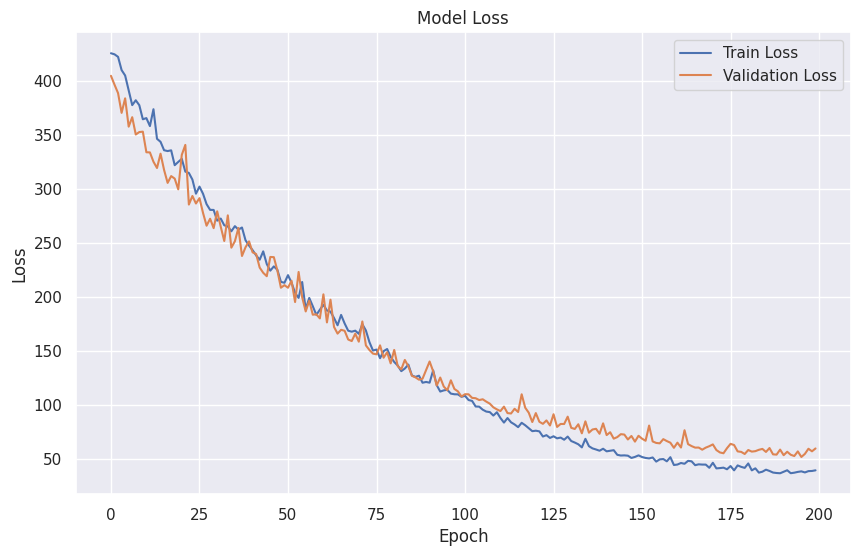

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for TensorFlow model
mse_tf = mean_squared_error(y_test, y_pred)
r2_tf = r2_score(y_test, y_pred)

print(f'TensorFlow Model - MSE: {mse_tf}, R²: {r2_tf}')


TensorFlow Model - MSE: 43.3976649174737, R²: 0.9988624166656652


# PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the original combined dataset
#data = pd.read_csv('/path/to/original_data.csv')

# Define features and target variables
features = data.drop(['Total_Blocks', 'Total_Cost'], axis=1)
target_blocks = data['Total_Blocks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_blocks, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # We are only interested in the first two principal components for this plot
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Explained variance ratio of each component: [0.65377989 0.26089704 0.05469353]


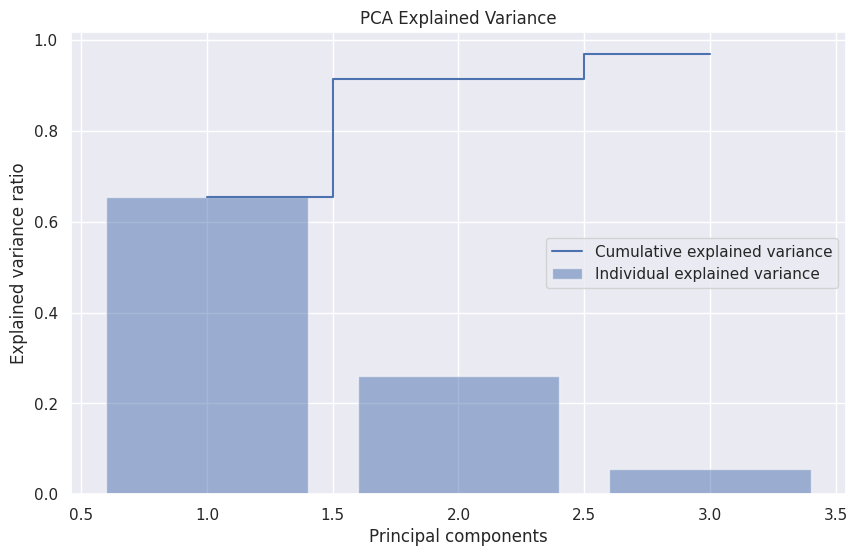

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio of each component: {explained_variance}')

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()


In [ ]:
# Train Random Forest Model on PCA components
model_rf_pca = RandomForestRegressor()
model_rf_pca.fit(X_train_pca, y_train)

# Evaluate the Random Forest Model
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

print(f'Random Forest Model (PCA) - MSE: {mse_rf_pca}, R²: {r2_rf_pca}')


Random Forest Model (PCA) - MSE: 384.1299673874443, R²: 0.9899307981212933


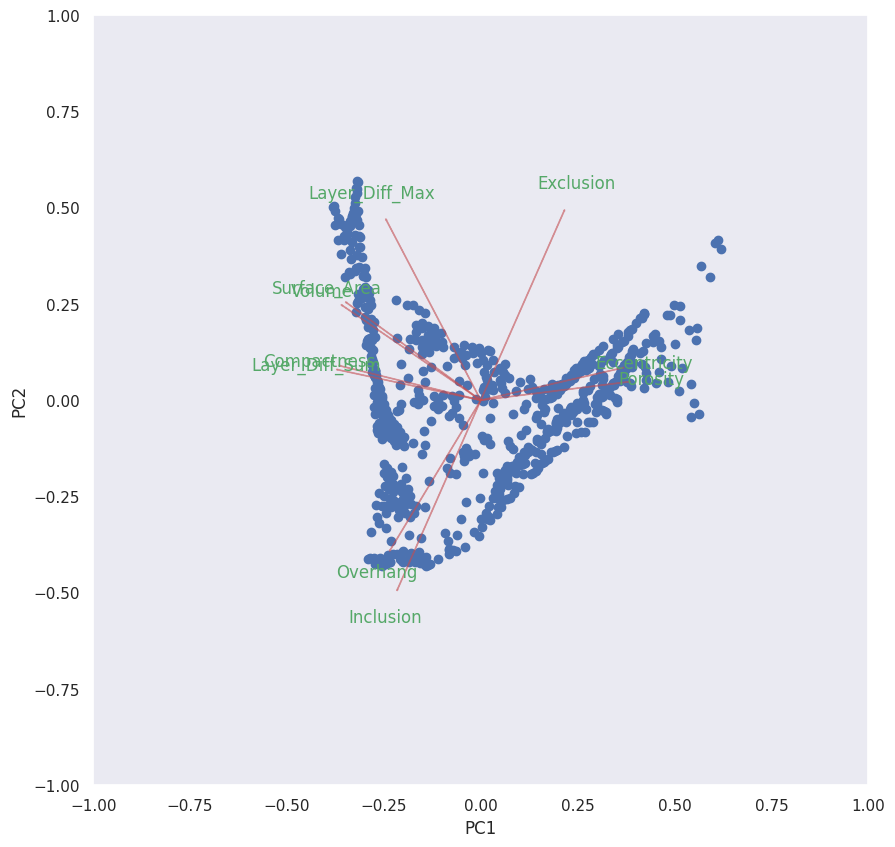

In [ ]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, features.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function with the first two principal components
myplot(X_train_pca[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()


# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train_pca is your PCA-transformed data


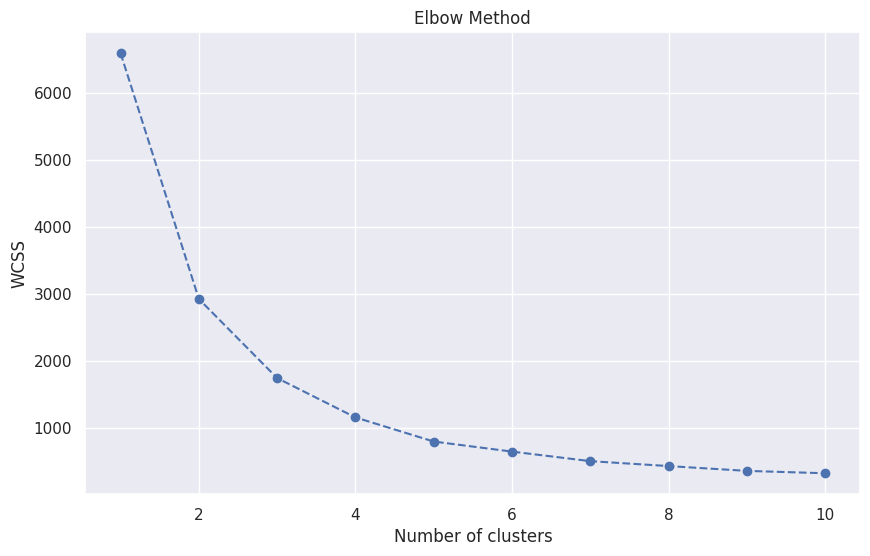

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_pca)

# Add the cluster labels to the PCA data
X_train_pca_clustered = np.column_stack((X_train_pca, y_kmeans))


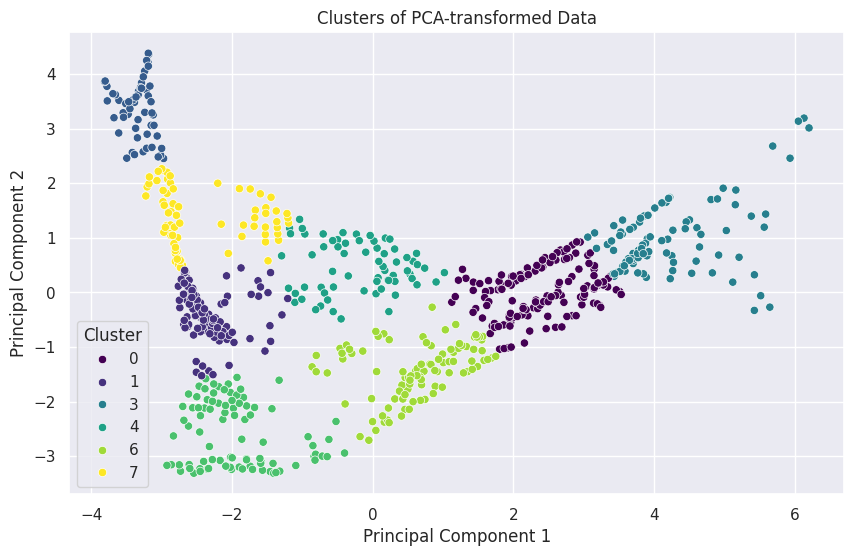

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_kmeans, palette='viridis')
plt.title('Clusters of PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
